<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

QR Decomposition

A method of decomposing a matrix into the product of an orthogonal matrix and an upper triangular matrix.
Given a matrix A with dimensions m x n: A = QR.
Q = m x n orthogonal matrix
R = n x m upper triangular matrix
You can complete QR decomposition using the Gram-Schmidt process

In [3]:
#gram-schmidt Qr decomp

def gs_qr(A):
  m, n = A.shape
  Q = np.zeros((m, n))
  R = np.zeros((n, n))

  for j in range(n):
    v = A[:, j]
    for i in range(j):
      R[i, j] = np.dot(Q[:, i], A[:, j])
      v = v - R[i, j] * Q[:, i]
    R[j, j] = np.linalg.norm(v)
    Q[:, j] = v / R[j, j]
  return Q, R

A = np.array([[1, 1], [1, 0], [0, 1]])
Q, R = gs_qr(A)

print("original matrix")
print(A)
print("orthogonal matrix")
print(Q)
print("upper triangular matrix")
print(R)

A_reconstructed = np.dot(Q, R)
print("reconstructed matrix")
print(A_reconstructed)



original matrix
[[1 1]
 [1 0]
 [0 1]]
orthogonal matrix
[[ 0.70710678  0.40824829]
 [ 0.70710678 -0.40824829]
 [ 0.          0.81649658]]
upper triangular matrix
[[1.41421356 0.70710678]
 [0.         1.22474487]]
reconstructed matrix
[[1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.73428748e-19]
 [0.00000000e+00 1.00000000e+00]]


Least-Squares Problem

A technique to find the best-fit for an overdetermined system of linear equations (more equations than unkown vars). Goal is to minimize sum of square of residuals.

Take example system Ax = b
A = m x n matrix where m > n
x os nx1 vector of unknowns
b is mx1 vector of targets

Residual: r = b - Ax
To minimize: minx = ||b-Ax||^2 (sub 2)

Least Squares can also be solved with QR decomposition: Rx = Q^T b

In [4]:
A = np.array([[1, 1], [1, 0], [0, 1]])
b = np.array([2, 1, 1])

ATA = np.dot(A.T, A)
ATb = np.dot(A.T, b)

x = np.linalg.solve(ATA, ATb)
print("solution using normalizing")
print(x)

Q, R = np.linalg.qr(A)
y = np.dot(Q.T, b)
x = np.linalg.solve(R, y)
print("solution using QR")
print(x)

solution using normalizing
[1. 1.]
solution using QR
[1. 1.]


Linear regression

This method models dependent and indepdent variables using a function to fit the data. The goal is to fnid the coefficient B1 to minimize:

 n sigma i=1 (yi - yhati)^2
 where
 yhati = B0 + d sigma j=1 (Bjxij)

 using minimization, the problem is:
 minB ||y - AB||^2

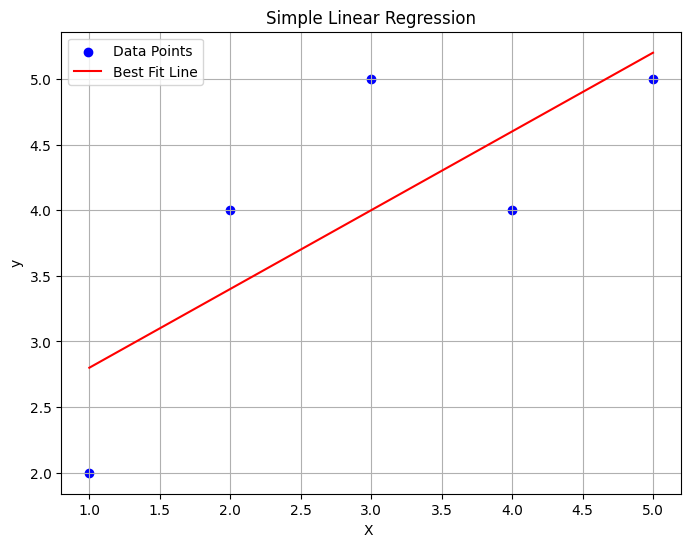

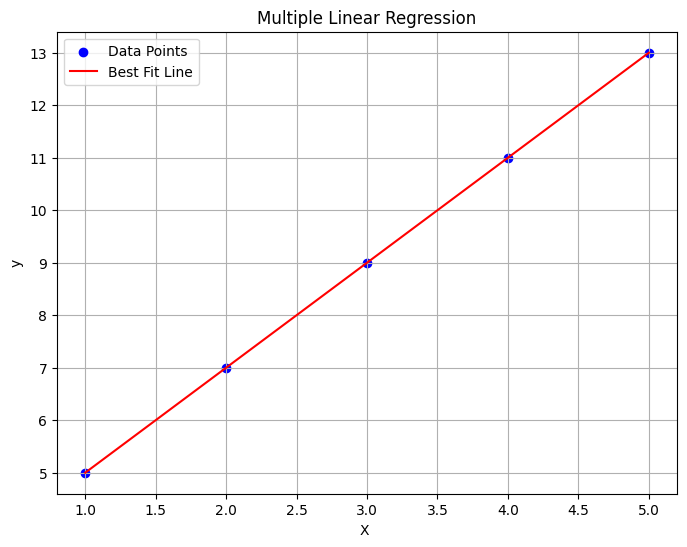

In [9]:
# single linreg using least squares

def lr_ls(x, y):
  A = np.vstack([np.ones(len(x)), x.T]).T # Transpose x before stacking to ensure compatible dimensions
  return np.linalg.lstsq(A, y, rcond=None)[0]

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

beta = lr_ls(x, y)
y_pred = beta[0] + beta[1] * x

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Best Fit Line')
plt.title("Simple Linear Regression")
plt.xlabel("X ")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#multiple linreg

x = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([5, 7, 9, 11, 13])
beta = lr_ls(x, y)
y_pred = beta[0] + beta[1] * x[:,0] + beta[2] * x[:,1] # Calculate y_pred for multiple linear regression

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], y, color='blue', label='Data Points') # Plot against the first column of x
plt.plot(x[:,0], y_pred, color='red', label='Best Fit Line')
plt.title("Multiple Linear Regression") # Change title to reflect multiple regression
plt.xlabel("X ")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()